## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap TCP full scan (normal)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [3]:
directory = '/home/user/notebooks/pcaps/nmap_tcp_full_scan_normal'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [5]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.075062
Name: time, dtype: float64

In [6]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [7]:
scan_times
#duration_list

0    0.075062
1    0.088767
2    0.072227
3    0.074965
4    0.074351
5    0.074199
6    0.076560
7    0.087263
8    0.086540
9    0.073181
Name: Scan times, dtype: float64

In [8]:
temp = pd.DataFrame(duration_list)

In [9]:
temp.mean()

0    0.078311
dtype: float64

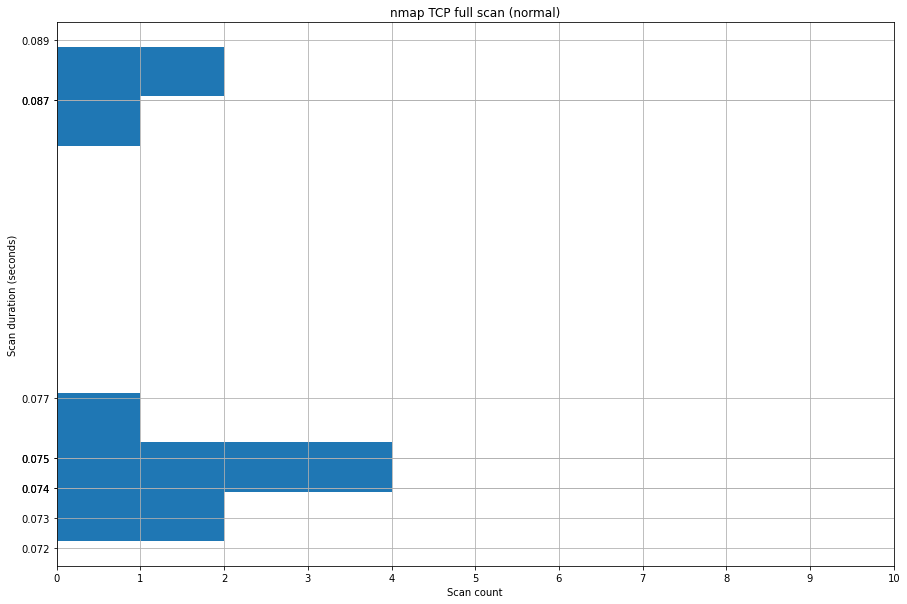

In [10]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [11]:
temp.describe()

0
count  10.000000
mean    0.078311
std     0.006480
min     0.072227
25%     0.074237
50%     0.075013
75%     0.084045
max     0.088767

## Packet count

In [12]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [13]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [14]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1566.2293434143066



## Order of ports scanned


In [15]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 56326 993
2 43446 22
3 50430 1025
4 47022 445
5 59180 3306
6 45382 8080
7 40064 110
8 41324 1723
9 51250 587
10 36850 25
11 54962 8888
12 46940 143
13 59476 995
14 53980 256
15 46044 139
16 45418 53
17 44760 1720
18 57882 111
19 46578 3389
20 54230 554
21 46082 199
22 47764 23
23 42894 443
24 39530 113
25 36684 21
26 55940 5900
27 57338 135
28 60008 80
29 33312 9010
30 36058 3261
31 46728 7921
32 36174 1022
33 57268 8873
34 59834 2008
35 44880 9877
36 57082 1079
37 43758 1218
38 42514 1104
39 53450 9618
40 60912 49155
41 44006 5961
42 33992 4279
43 37018 2006
44 42002 9593
45 38946 10626
46 49856 4111
47 49618 3390
48 38078 668
49 51220 6788
50 48986 1089
51 57074 5200
52 51086 5432
53 55814 1310
54 48124 1030
55 44940 2393
56 50968 119
57 50328 1035
58 59844 32780
59 57804 5120
60 45966 636
61 37370 1761
62 52038 4003
63 44582 6646
64 44540 52822
65 56202 2000
66 48270 4899
67 58558 5950
68 37882 1782
69 40362 6006
70 58784 7100
71 33850 5987
72 37864 1095
73 39790 5050
74 59458 390

607 37832 2288
608 52798 2003
609 57600 1021
610 50388 1023
611 53234 524
612 51036 3801
613 45042 5061
614 49958 2119
615 60884 2135
616 48250 7402
617 51490 3918
618 59144 64680
619 33820 1717
620 38502 2909
621 54776 2002
622 60066 2161
623 36290 4000
624 55422 32784
625 40204 541
626 50532 15000
627 49178 2160
628 40352 1086
629 42740 4567
630 52414 8652
631 41574 9898
632 57574 84
633 45086 2100
634 54752 32783
635 49816 5550
636 40296 1099
637 59652 1132
638 48844 1719
639 57422 1081
640 59016 9535
641 36158 1052
642 49456 8400
643 34306 5102
644 38752 7025
645 44980 3001
646 55480 5822
647 56000 311
648 37736 843
649 38202 14238
650 39800 1166
651 34986 726
652 39152 1503
653 44316 1122
654 49862 9101
655 39026 7007
656 53244 8651
657 38232 4001
658 47792 10621
659 50976 416
660 57800 3370
661 53880 9071
662 37572 515
663 32964 900
664 47270 1084
665 42938 783
666 47120 6580
667 43020 58080
668 36284 5001
669 54808 30
670 58324 10616
671 38206 9080
672 54178 3071
673 57178 109
6

607 52774 5631
608 45864 5269
609 53952 9071
610 37996 1782
611 34172 8099
612 50966 1113
613 38940 5962
614 51184 1721
615 46000 497
616 52898 2003
617 52790 12174
618 42948 7
619 53296 524
620 56378 3878
621 54460 1096
622 59944 8994
623 54020 1974
624 34238 54045
625 52806 7435
626 51508 306
627 57180 264
628 48280 1080
629 60242 6543
630 35988 7625
631 35852 2099
632 35518 3367
633 46502 5901
634 37526 5414
635 60822 1000
636 53626 901
637 46802 1031
638 41774 17988
639 51460 3269
640 46908 1583
641 52254 30718
642 35518 3920
643 43522 31337
644 49672 3390
645 41664 1001
646 52486 8652
647 45474 2710
648 35054 726
649 36806 1151
650 58866 7100
651 36898 8000
652 52670 5222
653 33838 60443
654 43526 5009
655 50352 52848
656 57446 1244
657 40304 27352
658 49008 50389
659 56574 3493
660 41302 13722
661 33400 6009
662 42180 3659
663 44694 5566
664 48628 700
665 54824 2002
666 33464 366
667 44160 301
668 48058 912
669 44732 5002
670 44664 3871
671 51760 25734
672 57354 2021
673 43882 10

207 52100 7019
208 57832 6788
209 33768 43
210 33034 8254
211 39736 7938
212 42370 32774
213 49200 1045
214 35554 1154
215 41526 8099
216 47190 514
217 46544 524
218 47518 1077
219 42162 8873
220 60754 1352
221 48672 5544
222 42788 32769
223 47730 512
224 49930 6669
225 55194 2045
226 44078 2103
227 43998 33899
228 33800 903
229 48920 4002
230 60214 55055
231 41886 32784
232 48226 5200
233 35636 1521
234 43630 13722
235 46412 2135
236 48232 16993
237 33836 1455
238 39770 2046
239 54756 8000
240 46728 15000
241 37190 1106
242 42792 2301
243 56236 1556
244 36050 6692
245 43506 425
246 44096 5961
247 55428 7
248 56776 2179
249 54262 1217
250 59708 9001
251 52870 1021
252 51608 3659
253 48992 1039
254 47032 5101
255 58920 8086
256 32848 3006
257 55190 9091
258 53394 20031
259 39826 9080
260 60102 3546
261 59302 1069
262 33494 5811
263 55830 6346
264 51892 6566
265 49902 5009
266 47652 4446
267 58680 9
268 43706 45100
269 43618 1296
270 40914 2107
271 35132 9200
272 48522 7106
273 59636 355

773 36390 6389
774 36014 9998
775 36134 11110
776 36048 1046
777 57596 5950
778 59050 55555
779 41354 9943
780 47870 6025
781 34724 311
782 37654 8022
783 50874 49
784 53424 3766
785 54754 2602
786 44058 49161
787 35270 458
788 35298 1688
789 34888 38292
790 59708 593
791 51542 8181
792 45832 1107
793 54822 49160
794 47684 9917
795 42416 1097
796 33700 1087
797 54530 31337
798 54510 9010
799 48508 2033
800 33832 1086
801 54356 636
802 41622 9009
803 40634 8800
804 48740 617
805 53144 49999
806 50200 15742
807 42148 7920
808 55618 5431
809 51436 10025
810 47470 2251
811 37858 3367
812 58280 1035
813 42808 1524
814 47068 1031
815 50920 83
816 55406 9900
817 52486 7778
818 38600 9110
819 43098 911
820 36606 179
821 40220 3918
822 33526 8222
823 37240 5440
824 42726 1201
825 38042 5500
826 36586 705
827 50706 17
828 54930 5080
829 46698 691
830 56860 8089
831 46658 3878
832 41670 3017
833 57740 5003
834 53108 427
835 50898 5405
836 52366 2605
837 58604 2041
838 33828 5033
839 40948 1041
84

940 34582 32785
941 37284 7004
942 34528 5214
943 46916 5004
944 45794 1137
945 56936 2035
946 42386 8082
947 47894 4006
948 58774 683
949 56296 1984
950 49860 2135
951 60044 3322
952 39126 3261
953 40672 8402
954 46394 27356
955 55040 9998
956 49996 16993
957 39622 7777
958 49866 9877
959 48736 10215
960 55392 1059
961 43358 3351
962 58986 32782
963 46162 5859
964 42540 25734
965 46206 83
966 36208 1688
967 34284 1217
968 59438 8001
969 56008 301
970 59938 1974
971 55538 4900
972 45640 1658
973 41244 6543
974 44680 1183
975 36868 1185
976 46776 62078
977 32908 19842
978 49118 9111
979 49340 2049
980 38578 3071
981 47184 7911
982 56166 515
983 57446 4111
984 37792 65389
985 57750 56737
986 60272 49159
987 49582 49158
988 60588 16000
989 48982 1174
990 59626 3001
991 43778 1081
992 49140 3221
993 49226 55055
994 41502 10024
995 59134 2021
996 52994 4899
997 37014 1107
998 49608 3689
999 48204 1187
1000 39960 6009
1 41062 1723
2 50142 1025
3 56052 993
4 39722 110
5 46254 3389
6 50982 587

606 37626 2288
607 48838 1038
608 57106 1081
609 41848 3659
610 59404 2045
611 50888 6788
612 47850 44501
613 36050 5001
614 39808 27000
615 39786 541
616 51698 711
617 48230 8089
618 53510 3011
619 54566 30
620 48528 8086
621 56000 8093
622 54984 1186
623 45010 144
624 44076 1117
625 32952 6009
626 43438 1218
627 35816 2607
628 52746 49154
629 45344 28201
630 60560 625
631 51260 25734
632 45060 83
633 55108 8222
634 41590 3828
635 60688 44443
636 45334 1072
637 49974 49999
638 54488 1041
639 36514 5911
640 39382 1801
641 54570 10009
642 52128 1083
643 34644 6003
644 47450 10621
645 55844 512
646 39446 1166
647 34828 6002
648 58690 8701
649 55916 3814
650 40834 1071
651 51906 9998
652 56636 2382
653 59434 1132
654 52626 648
655 58984 6106
656 51714 16001
657 58246 1068
658 46390 3809
659 50676 1113
660 53406 5051
661 42240 616
662 42608 7
663 44966 38292
664 46852 6580
665 56406 5730
666 52340 3766
667 48722 50389
668 49406 3390
669 55948 10010
670 40848 1334
671 45546 5269
672 44624 9

273 43186 1201
274 59702 1069
275 35286 3971
276 41332 25735
277 51282 1234
278 55052 6792
279 41714 5560
280 46366 7911
281 60546 55055
282 40678 765
283 36998 3920
284 60232 500
285 57308 1137
286 44770 2638
287 45972 9099
288 51154 1334
289 46150 42
290 42208 30951
291 36610 667
292 46080 1309
293 44650 2869
294 39354 2323
295 33164 109
296 54312 3283
297 45684 545
298 43688 7103
299 60612 1461
300 38388 12345
301 42026 6003
302 60546 2099
303 51132 1092
304 48864 9593
305 50522 999
306 36884 3323
307 55220 34572
308 47846 1053
309 55354 9207
310 42722 5903
311 47522 32782
312 52810 20000
313 45528 5960
314 36134 668
315 38440 254
316 41044 19780
317 39980 7496
318 34134 1087
319 59040 1040
320 45354 6543
321 50492 2394
322 53866 1083
323 43738 1119
324 43638 21571
325 56576 49156
326 60024 1839
327 47058 15000
328 58318 6788
329 52624 5678
330 59356 27353
331 52776 32783
332 52438 2035
333 59384 1028
334 48314 19801
335 36464 11110
336 44054 1296
337 58318 10009
338 40398 1935
339 

939 34250 32779
940 34056 5815
941 44416 6005
942 57398 1145
943 54982 6106
944 35646 497
945 54658 10617
946 36836 16012
947 56006 4001
948 54534 8082
949 44008 1060
950 52062 4242
951 36666 406
952 55052 3
953 56440 1199
954 47136 1862
955 42310 8701
956 44564 5801
957 60562 2601
958 52880 2121
959 41286 2107
960 45290 26214
961 55858 8600
962 44340 27355
963 35142 65129
964 52768 10628
965 35414 2004
966 51442 749
967 40140 9535
968 49512 1658
969 51232 1022
970 43954 425
971 34856 5120
972 34370 1065
973 44480 1049
974 60566 89
975 55890 4279
976 46998 691
977 52150 722
978 40576 30
979 46612 1687
980 34634 2065
981 58496 25734
982 44266 1192
983 37834 3301
984 49844 4000
985 46268 683
986 58224 8007
987 47720 1090
988 48270 50389
989 54078 1169
990 47520 3011
991 52508 1073
992 47576 5002
993 41158 32775
994 41092 2222
995 47966 33354
996 34318 5922
997 56488 783
998 46138 7025
999 47412 1031
1000 55874 7
1 34430 135
2 36790 3389
3 33550 3306
4 60152 110
5 37802 1723
6 60960 80
7 

606 52694 10082
607 35390 8000
608 34970 5357
609 49806 2160
610 41960 1084
611 40208 5802
612 49764 5054
613 56278 1801
614 40064 42
615 34894 4848
616 43614 3766
617 59016 1024
618 37978 4003
619 47110 1011
620 59762 366
621 46734 18101
622 38220 4998
623 56336 49155
624 42066 458
625 44758 49157
626 55422 1782
627 53406 32781
628 43642 1259
629 52274 19842
630 39530 1524
631 41244 1805
632 36184 2000
633 48434 2718
634 46360 52673
635 44664 2809
636 34650 163
637 50540 64680
638 58912 389
639 60260 898
640 49234 3918
641 33838 2068
642 37598 726
643 41512 3371
644 57988 10004
645 57700 6101
646 47900 2383
647 53318 10003
648 57506 1
649 41882 5061
650 37176 3690
651 45846 888
652 48250 16080
653 58556 40193
654 41874 9040
655 44254 7999
656 36098 2046
657 56180 7201
658 44498 50389
659 60612 32785
660 35566 465
661 36264 3077
662 47704 264
663 51586 3300
664 38380 5100
665 57316 1300
666 56240 16000
667 49452 1812
668 46694 8022
669 53600 6009
670 47858 1198
671 37344 5226
672 51488

272 55952 8600
273 44612 1186
274 46068 5214
275 35240 38292
276 59112 1147
277 49114 8045
278 37852 1080
279 42116 20
280 57418 2701
281 44302 10010
282 45622 5960
283 53592 2200
284 44080 161
285 33708 9968
286 53704 1443
287 51226 2022
288 54680 8654
289 60672 89
290 55748 1236
291 35782 366
292 35934 1154
293 36612 301
294 45342 3211
295 34174 13782
296 55146 51493
297 36566 3889
298 50854 9050
299 46302 2100
300 43778 7103
301 50118 5679
302 46444 7911
303 51716 5915
304 33758 3871
305 55642 2045
306 47472 5101
307 58900 3517
308 54900 52869
309 35820 306
310 43270 50006
311 43484 1059
312 51450 1165
313 42652 5222
314 39742 2399
315 33426 8254
316 44342 1192
317 46668 515
318 56580 5357
319 40014 1126
320 54746 10617
321 33890 7100
322 40328 50001
323 60880 3390
324 52320 2909
325 34440 1065
326 58408 10009
327 58270 8007
328 54426 1055
329 58158 5003
330 41162 19842
331 47296 1783
332 52468 407
333 34490 6646
334 54742 14000
335 48876 32777
336 51106 1026
337 51150 1583
338 5697

939 38906 12265
940 48830 1272
941 57246 2179
942 47056 691
943 52634 7019
944 45658 27715
945 41918 44442
946 36976 2001
947 33252 109
948 34946 3476
949 43806 2144
950 34400 1032
951 46578 9878
952 55960 4279
953 52600 1073
954 47186 1500
955 33596 6006
956 46668 2875
957 49720 1113
958 52486 548
959 47628 514
960 39738 49157
961 38994 1098
962 41472 9666
963 42708 5904
964 36562 9485
965 33224 3006
966 34720 2065
967 54938 636
968 41828 9943
969 48200 3001
970 36010 1521
971 45578 2492
972 60958 55600
973 41778 5560
974 53326 3324
975 52954 2121
976 44752 2869
977 37796 2009
978 52304 6059
979 54512 808
980 55572 32785
981 52516 2035
982 45620 10000
983 34564 801
984 58408 3986
985 50762 50636
986 38184 49400
987 59592 55555
988 44274 62078
989 36218 14442
990 46920 8192
991 58266 58080
992 54966 1029
993 57764 8180
994 51226 1092
995 50216 2382
996 42110 6003
997 47210 7921
998 53622 6567
999 55720 1033
1000 53146 5906
1 57350 1025
2 54130 8080
3 54718 445
4 34336 53
5 59240 8888
6

605 39158 2998
606 43870 9002
607 60258 9876
608 50652 18101
609 47712 5801
610 50836 900
611 48150 10616
612 58126 1117
613 47220 2105
614 44738 8400
615 45942 3737
616 45634 1641
617 37540 8089
618 54264 1102
619 34310 1259
620 38124 3
621 45794 1972
622 44680 1166
623 34696 1186
624 47194 9000
625 38946 20031
626 37646 85
627 40604 1097
628 46356 5003
629 60366 1002
630 59674 1121
631 37618 1322
632 44600 4006
633 55268 524
634 39038 5802
635 41570 30
636 59130 5440
637 50882 7000
638 47510 902
639 50384 64623
640 45786 6547
641 50564 3766
642 50616 8899
643 32794 5030
644 36748 17877
645 38218 8085
646 60606 6003
647 40094 1080
648 56256 5051
649 41062 903
650 54140 3920
651 35780 1503
652 49092 8200
653 36816 981
654 59426 1248
655 41836 1036
656 49398 3784
657 55394 1687
658 54676 2049
659 37110 31038
660 35646 22939
661 48568 20222
662 60212 481
663 57996 2107
664 39324 444
665 46936 1271
666 51326 7911
667 42222 2401
668 41620 125
669 40066 1165
670 56358 5226
671 60048 20
672 

272 53104 99
273 56244 10010
274 41492 1145
275 52528 1029
276 58678 10621
277 60234 714
278 36698 5850
279 34390 7106
280 42604 2020
281 43142 9898
282 47732 109
283 51700 1163
284 44674 7103
285 54182 1812
286 52768 3766
287 43886 55055
288 43156 19350
289 56182 10628
290 44014 3827
291 38144 12265
292 40990 1600
293 40100 1875
294 54740 5101
295 51340 648
296 59666 5859
297 56272 999
298 34612 2170
299 48822 5100
300 56358 6547
301 38474 2910
302 41284 9111
303 46334 27352
304 43272 14000
305 54350 28201
306 52874 50636
307 43130 407
308 50308 3260
309 42556 7001
310 55592 49160
311 35160 27000
312 51444 62078
313 34956 10001
314 60100 32784
315 55246 2196
316 57102 6667
317 35718 63331
318 59190 2200
319 47504 4900
320 56146 1166
321 41272 27715
322 53278 1049
323 51114 5678
324 53370 4443
325 36128 9010
326 40976 5811
327 42272 5822
328 57788 2604
329 37384 6699
330 46118 18988
331 51120 787
332 56750 9999
333 44938 64623
334 59372 1783
335 53492 3689
336 47354 6112
337 45154 1038

938 38330 84
939 47178 5061
940 55292 625
941 47020 8383
942 48604 55600
943 41066 1000
944 43394 1084
945 33968 10616
946 53624 2008
947 43520 2909
948 39850 49999
949 41178 720
950 46944 14442
951 38360 1233
952 42156 4002
953 54142 22939
954 51914 6646
955 41628 17988
956 43884 1090
957 41344 458
958 33990 8193
959 39872 52869
960 59614 9103
961 57652 5431
962 38214 37
963 59360 43
964 45932 1259
965 32806 20828
966 57312 2366
967 43076 19283
968 58434 222
969 42276 10778
970 54230 1089
971 44196 9998
972 57228 3517
973 37070 1149
974 51278 13722
975 52304 4005
976 60186 5915
977 60094 5962
978 36200 6666
979 47964 32770
980 44592 5910
981 40318 5002
982 58870 9207
983 54208 1098
984 44332 5560
985 36842 32769
986 45302 3007
987 51204 1071
988 37112 1056
989 49558 16016
990 47912 2381
991 34058 6566
992 53412 49159
993 47630 21571
994 59196 464
995 59904 3826
996 57554 12174
997 60238 9618
998 42180 8873
999 53900 3333
1000 53192 32777


In [16]:
orders_port

scannr  sport  dport
0          1  56326    993
1          2  43446     22
2          3  50430   1025
3          4  47022    445
4          5  59180   3306
...      ...    ...    ...
9995     996  57554  12174
9996     997  60238   9618
9997     998  42180   8873
9998     999  53900   3333
9999    1000  53192  32777

[10000 rows x 3 columns]

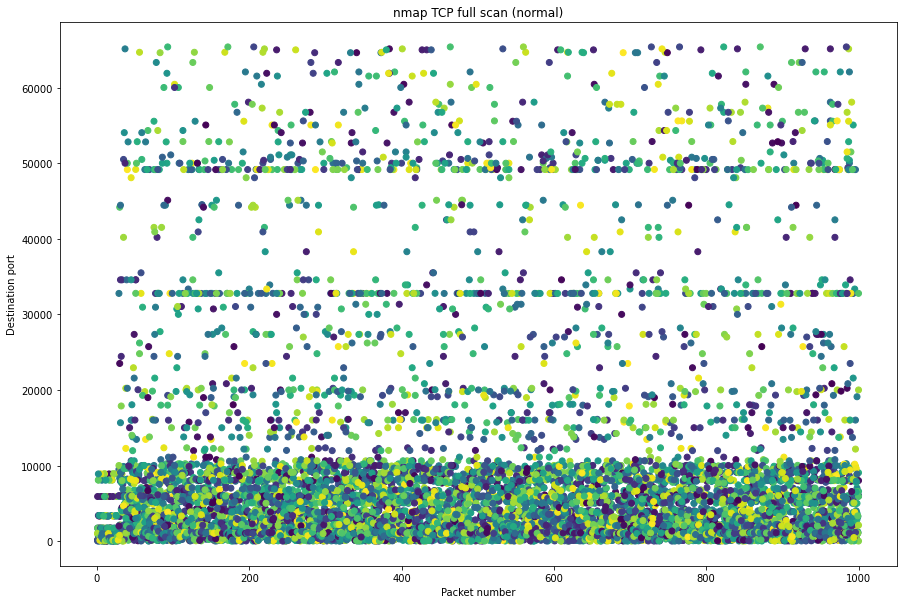

In [17]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [18]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [19]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

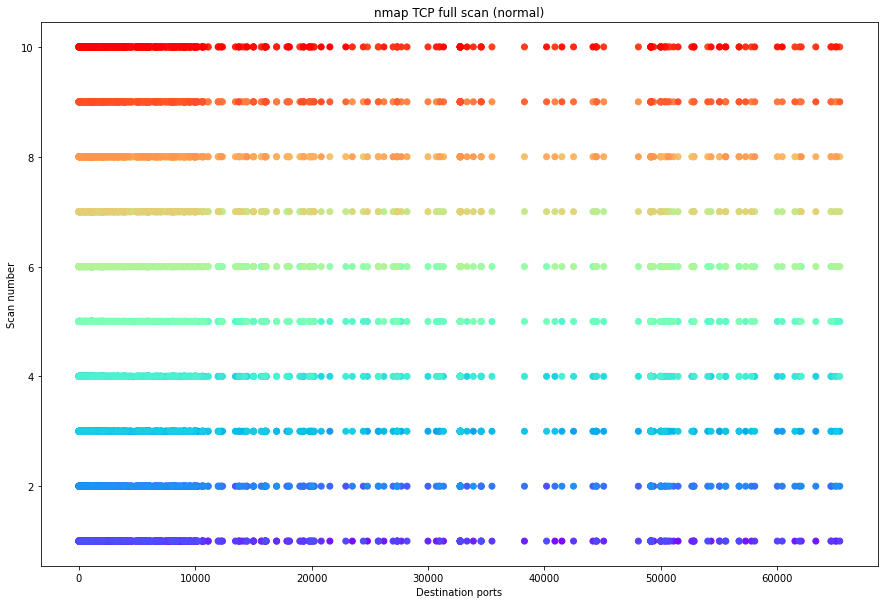

In [20]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [21]:
payloads.value_counts()

Series([], dtype: int64)

## IP-ID

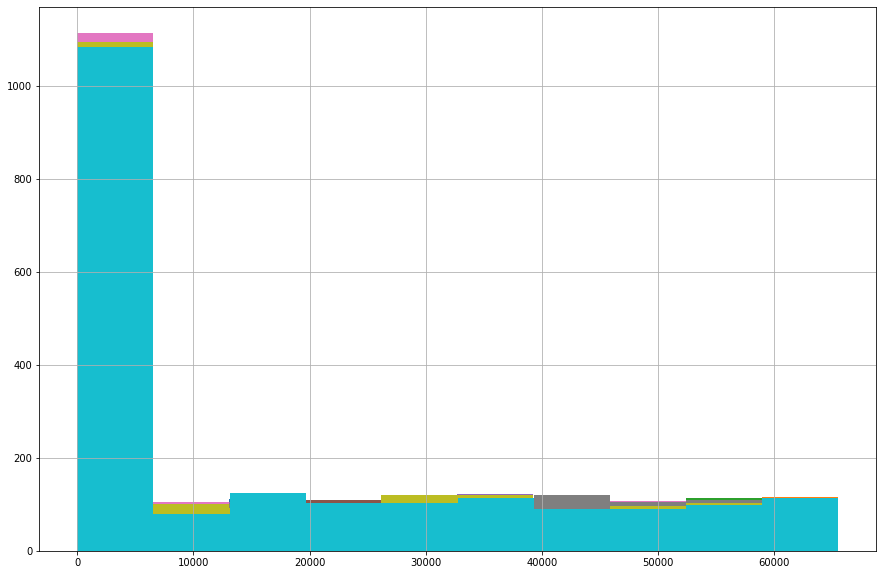

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

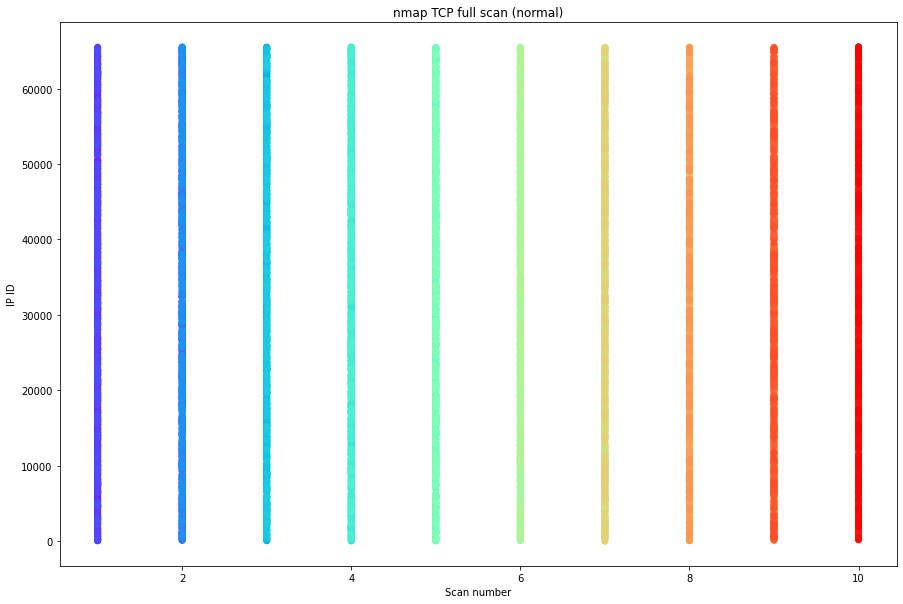

In [26]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


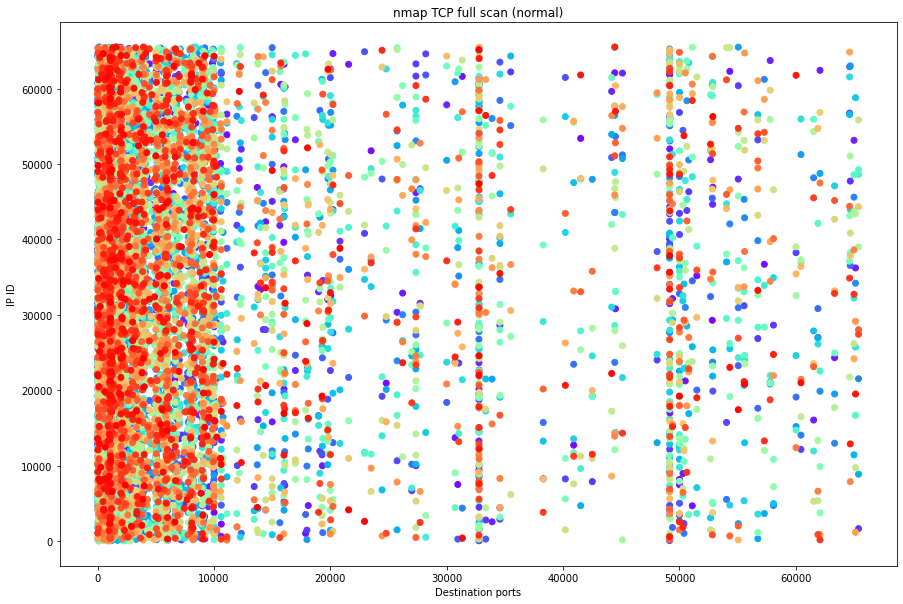

In [27]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

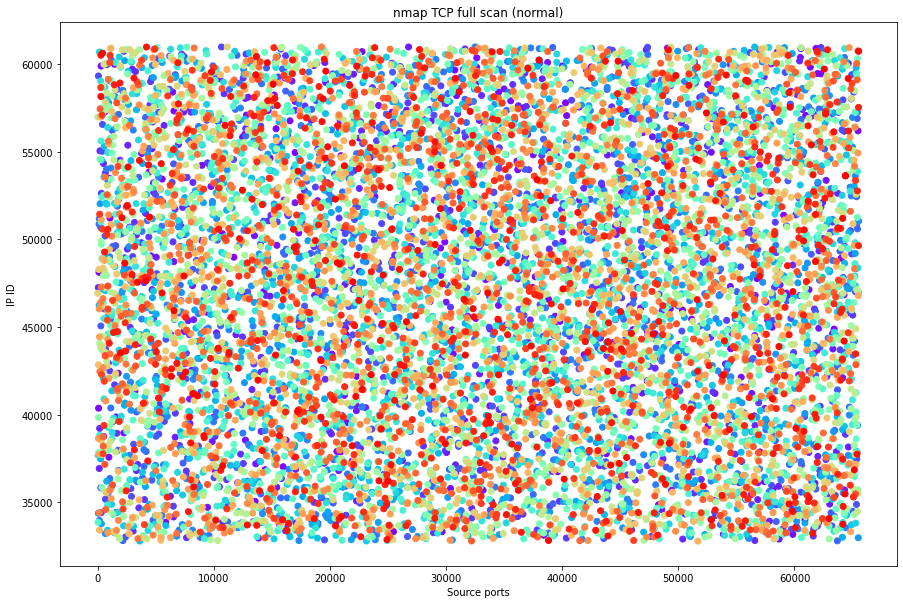

In [28]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

## TCP Window size

In [30]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

## Sequence number


In [31]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 1732381998
Sequence number: 1301926486
Sequence number: 1352376965
Sequence number: 2964063315
Sequence number: 2889334568
Sequence number: 49158194
Sequence number: 3696074780
Sequence number: 3457581782
Sequence number: 1615517623
Sequence number: 4206555646
Sequence number: 1690669649
Sequence number: 3950540828
Sequence number: 3191914298
Sequence number: 545792508
Sequence number: 3551652375
Sequence number: 29972464
Sequence number: 2276644580
Sequence number: 155624595
Sequence number: 128809565
Sequence number: 2095955247
Sequence number: 2063035244
Sequence number: 3243658408
Sequence number: 670456718
Sequence number: 3730955012
Sequence number: 205348407
Sequence number: 3729464285
Sequence number: 1726817550
Sequence number: 773578221
Sequence number: 2555994865
Sequence number: 1492715930
Sequence number: 3033079874
Sequence number: 537564629
Sequence number: 130836609
Sequence number: 2752977527
Sequence number: 1639762537
Sequence number: 1062886455
Sequ

Sequence number: 3139778797
Sequence number: 1912322324
Sequence number: 608875159
Sequence number: 1175588625
Sequence number: 2695813635
Sequence number: 2642559783
Sequence number: 410550100
Sequence number: 960584072
Sequence number: 4103857031
Sequence number: 1699119902
Sequence number: 243142299
Sequence number: 3212890807
Sequence number: 1633213323
Sequence number: 725665001
Sequence number: 2455245312
Sequence number: 213077587
Sequence number: 629840621
Sequence number: 1481022863
Sequence number: 1746050402
Sequence number: 3256275174
Sequence number: 2589337113
Sequence number: 4213797781
Sequence number: 2311604007
Sequence number: 2588319292
Sequence number: 2771503830
Sequence number: 4114017380
Sequence number: 158936063
Sequence number: 3948606625
Sequence number: 3539609121
Sequence number: 2437667053
Sequence number: 3165721366
Sequence number: 1552768249
Sequence number: 1808941021
Sequence number: 1944743772
Sequence number: 933784123
Sequence number: 3440377504
S

Sequence number: 3818017072
Sequence number: 2223618695
Sequence number: 2213999679
Sequence number: 3539786721
Sequence number: 2206569425
Sequence number: 3911292780
Sequence number: 328687295
Sequence number: 1089752485
Sequence number: 4146381525
Sequence number: 1443520057
Sequence number: 356874378
Sequence number: 3883260660
Sequence number: 3390861341
Sequence number: 3622279516
Sequence number: 3650580841
Sequence number: 211030986
Sequence number: 4016017186
Sequence number: 265427028
Sequence number: 911839325
Sequence number: 2614007033
Sequence number: 3619295142
Sequence number: 3244963091
Sequence number: 2687951674
Sequence number: 3767173076
Sequence number: 2735228998
Sequence number: 94093055
Sequence number: 3633420981
Sequence number: 1037981084
Sequence number: 4202483333
Sequence number: 2214155686
Sequence number: 2373714074
Sequence number: 220838660
Sequence number: 1851539150
Sequence number: 2413617222
Sequence number: 1677854564
Sequence number: 3188483210


Sequence number: 2498532981
Sequence number: 2411001039
Sequence number: 1267182122
Sequence number: 2038090570
Sequence number: 1805243547
Sequence number: 3879268688
Sequence number: 3773558087
Sequence number: 3690609425
Sequence number: 1035563151
Sequence number: 3780229085
Sequence number: 1307546503
Sequence number: 4193954947
Sequence number: 4127329629
Sequence number: 1798942795
Sequence number: 2932027754
Sequence number: 2407966249
Sequence number: 1166741232
Sequence number: 1689413059
Sequence number: 1703811030
Sequence number: 110727719
Sequence number: 2518757332
Sequence number: 1523760733
Sequence number: 3220713814
Sequence number: 1437645975
Sequence number: 4042483266
Sequence number: 185467254
Sequence number: 1299749818
Sequence number: 2223855668
Sequence number: 2953348291
Sequence number: 383098122
Sequence number: 60722256
Sequence number: 3700905744
Sequence number: 3986535749
Sequence number: 1899477814
Sequence number: 2372011276
Sequence number: 38405756

Sequence number: 2164974981
Sequence number: 4063595735
Sequence number: 4273627978
Sequence number: 2767496588
Sequence number: 2273294311
Sequence number: 2768806232
Sequence number: 2396060467
Sequence number: 1323581015
Sequence number: 3845136913
Sequence number: 4132668991
Sequence number: 4216803753
Sequence number: 4141743259
Sequence number: 3439137309
Sequence number: 1303670657
Sequence number: 3145410657
Sequence number: 4075558480
Sequence number: 652551274
Sequence number: 2819912291
Sequence number: 412121243
Sequence number: 3259030051
Sequence number: 2877373189
Sequence number: 1276379498
Sequence number: 4227700853
Sequence number: 2912917122
Sequence number: 579510172
Sequence number: 3215935880
Sequence number: 1388084990
Sequence number: 1313221147
Sequence number: 938704816
Sequence number: 4224693743
Sequence number: 1469638110
Sequence number: 1169511915
Sequence number: 1834687168
Sequence number: 539338821
Sequence number: 49412766
Sequence number: 3113838742

Sequence number: 2844486888
Sequence number: 2031324975
Sequence number: 743565187
Sequence number: 252770294
Sequence number: 357032189
Sequence number: 322877161
Sequence number: 1292725511
Sequence number: 1185070399
Sequence number: 2366497016
Sequence number: 1674453943
Sequence number: 1556212724
Sequence number: 1540290207
Sequence number: 958859008
Sequence number: 2098250506
Sequence number: 877932333
Sequence number: 1123359633
Sequence number: 83091573
Sequence number: 3075661672
Sequence number: 4125123382
Sequence number: 1461479502
Sequence number: 1622350644
Sequence number: 1319110698
Sequence number: 4136736921
Sequence number: 2267886297
Sequence number: 943649937
Sequence number: 2408161329
Sequence number: 2820840238
Sequence number: 1503936627
Sequence number: 1178758142
Sequence number: 3088158740
Sequence number: 2327371058
Sequence number: 1651941851
Sequence number: 437987920
Sequence number: 2576000985
Sequence number: 1803952413
Sequence number: 2470195246
Se

Sequence number: 588428749
Sequence number: 2342326346
Sequence number: 586612747
Sequence number: 1302107411
Sequence number: 596717792
Sequence number: 2393477617
Sequence number: 4152870515
Sequence number: 101158612
Sequence number: 837537073
Sequence number: 1259688082
Sequence number: 2858949893
Sequence number: 1420721030
Sequence number: 3668919861
Sequence number: 2258672297
Sequence number: 2688589327
Sequence number: 362780293
Sequence number: 3802507639
Sequence number: 1922378316
Sequence number: 1900480372
Sequence number: 2813092893
Sequence number: 700115724
Sequence number: 3467856203
Sequence number: 191802618
Sequence number: 3643745304
Sequence number: 382440895
Sequence number: 3345759194
Sequence number: 3636278314
Sequence number: 2541724606
Sequence number: 1592991857
Sequence number: 1034002672
Sequence number: 1985020842
Sequence number: 4285213564
Sequence number: 241139034
Sequence number: 1921677817
Sequence number: 3187019874
Sequence number: 1460096880
Se

Sequence number: 325692878
Sequence number: 2050569548
Sequence number: 463353369
Sequence number: 1198111973
Sequence number: 1312138500
Sequence number: 3960109467
Sequence number: 4090950454
Sequence number: 1937824394
Sequence number: 1855092601
Sequence number: 3553203801
Sequence number: 235443771
Sequence number: 2154070148
Sequence number: 2072740117
Sequence number: 4200169804
Sequence number: 3935542092
Sequence number: 3075416271
Sequence number: 2337952097
Sequence number: 126253491
Sequence number: 959436151
Sequence number: 2647627084
Sequence number: 410363878
Sequence number: 2725418618
Sequence number: 2042848402
Sequence number: 623680922
Sequence number: 1717073368
Sequence number: 3909788847
Sequence number: 3156010653
Sequence number: 1626958966
Sequence number: 1523342816
Sequence number: 2901198534
Sequence number: 2925898780
Sequence number: 35167989
Sequence number: 3592078537
Sequence number: 3715393157
Sequence number: 1713684679
Sequence number: 3857183198
S

Sequence number: 3470142284
Sequence number: 1937392812
Sequence number: 2237033174
Sequence number: 842216863
Sequence number: 4284684888
Sequence number: 2088577401
Sequence number: 3685502480
Sequence number: 2485360555
Sequence number: 845332880
Sequence number: 570544307
Sequence number: 3041134156
Sequence number: 1496352822
Sequence number: 2986839889
Sequence number: 4225213067
Sequence number: 3999110808
Sequence number: 337401009
Sequence number: 436554636
Sequence number: 1221627594
Sequence number: 665660702
Sequence number: 2059602141
Sequence number: 3866676395
Sequence number: 880433989
Sequence number: 2235420675
Sequence number: 4145464615
Sequence number: 2017712026
Sequence number: 1985053349
Sequence number: 2448254357
Sequence number: 729108065
Sequence number: 610319609
Sequence number: 711782866
Sequence number: 265922785
Sequence number: 1191560490
Sequence number: 3687750271
Sequence number: 3920018764
Sequence number: 3128377264
Sequence number: 972618090
Sequ

Sequence number: 2650045405
Sequence number: 1538712392
Sequence number: 2634670089
Sequence number: 3518967433
Sequence number: 1868893350
Sequence number: 3222433929
Sequence number: 19481494
Sequence number: 4237752576
Sequence number: 979706685
Sequence number: 2070375370
Sequence number: 1592033424
Sequence number: 484265130
Sequence number: 665414224
Sequence number: 2371201046
Sequence number: 1444046627
Sequence number: 3409931130
Sequence number: 1636546439
Sequence number: 3351276914
Sequence number: 1921467847
Sequence number: 3913110728
Sequence number: 3267299909
Sequence number: 775765990
Sequence number: 3531610988
Sequence number: 639119168
Sequence number: 1695611844
Sequence number: 3599656081
Sequence number: 2524370330
Sequence number: 1877142229
Sequence number: 939043774
Sequence number: 3953292013
Sequence number: 3490783805
Sequence number: 1406854097
Sequence number: 3070294307
Sequence number: 1898633832
Sequence number: 3182247668
Sequence number: 844663258
S

Sequence number: 3601509775
Sequence number: 1436368116
Sequence number: 2708615858
Sequence number: 2656534122
Sequence number: 2560516601
Sequence number: 2915192202
Sequence number: 1057154372
Sequence number: 2852997919
Sequence number: 2244759198
Sequence number: 2065958937
Sequence number: 4014571932
Sequence number: 479901409
Sequence number: 701881012
Sequence number: 3981276393
Sequence number: 3644331595
Sequence number: 3885142960
Sequence number: 3259622651
Sequence number: 3882766447
Sequence number: 374055141
Sequence number: 561161217
Sequence number: 2511520080
Sequence number: 1037969940
Sequence number: 3339293638
Sequence number: 4029164650
Sequence number: 1696943348
Sequence number: 980601066
Sequence number: 2295055628
Sequence number: 1237732153
Sequence number: 279164850
Sequence number: 4153351327
Sequence number: 3299399427
Sequence number: 3616831445
Sequence number: 2839505486
Sequence number: 349095018
Sequence number: 2492885082
Sequence number: 3335539828

Sequence number: 2686195946
Sequence number: 1697772710
Sequence number: 990198925
Sequence number: 3002145185
Sequence number: 1204038754
Sequence number: 4288806477
Sequence number: 3457169396
Sequence number: 3977734434
Sequence number: 797786162
Sequence number: 2803002035
Sequence number: 487033530
Sequence number: 2107194045
Sequence number: 2010975804
Sequence number: 119108873
Sequence number: 763838933
Sequence number: 198120506
Sequence number: 2645946739
Sequence number: 2624063146
Sequence number: 126621695
Sequence number: 4034830228
Sequence number: 3558476023
Sequence number: 4116422607
Sequence number: 8119501
Sequence number: 1474367208
Sequence number: 521178415
Sequence number: 1596486019
Sequence number: 2249891364
Sequence number: 2642293193
Sequence number: 2780881130
Sequence number: 2878512121
Sequence number: 924505145
Sequence number: 3592948331
Sequence number: 2686587873
Sequence number: 3593790297
Sequence number: 2483347291
Sequence number: 1827126922
Sequ

Sequence number: 2061445964
Sequence number: 2508845871
Sequence number: 4040091703
Sequence number: 2179457699
Sequence number: 1399130280
Sequence number: 1609431924
Sequence number: 3956623883
Sequence number: 1925190913
Sequence number: 3930497850
Sequence number: 2305571706
Sequence number: 2500816904
Sequence number: 4223696302
Sequence number: 4071771230
Sequence number: 828058956
Sequence number: 395963627
Sequence number: 2258239796
Sequence number: 424323467
Sequence number: 81776500
Sequence number: 2390293379
Sequence number: 2902519390
Sequence number: 905608929
Sequence number: 2369136562
Sequence number: 865104366
Sequence number: 3926449098
Sequence number: 312231482
Sequence number: 661957415
Sequence number: 2069247498
Sequence number: 4177610392
Sequence number: 3783408509
Sequence number: 3854943658
Sequence number: 3850495826
Sequence number: 2772673739
Sequence number: 3926638867
Sequence number: 3432270890
Sequence number: 2848891754
Sequence number: 3496650458
S

Sequence number: 3351110828
Sequence number: 1261470043
Sequence number: 3957524353
Sequence number: 83783622
Sequence number: 2935560275
Sequence number: 2946935261
Sequence number: 2174912122
Sequence number: 872189312
Sequence number: 3994055468
Sequence number: 4141934575
Sequence number: 3448118490
Sequence number: 2863532251
Sequence number: 1402981913
Sequence number: 342178601
Sequence number: 2297171645
Sequence number: 525144313
Sequence number: 1452333106
Sequence number: 3235906594
Sequence number: 4238136577
Sequence number: 720407185
Sequence number: 4187761585
Sequence number: 2255123033
Sequence number: 3445402167
Sequence number: 3691046398
Sequence number: 322845435
Sequence number: 319248746
Sequence number: 3191495892
Sequence number: 1831329592
Sequence number: 3268209447
Sequence number: 2554635401
Sequence number: 3625405663
Sequence number: 2167585825
Sequence number: 3870785467
Sequence number: 3225525067
Sequence number: 2436715952
Sequence number: 3605817073


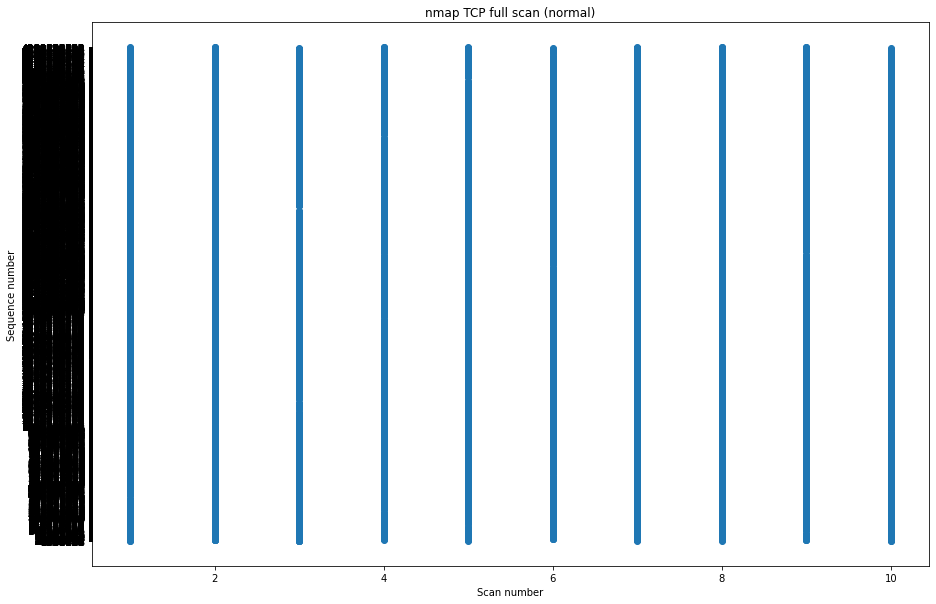

In [32]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


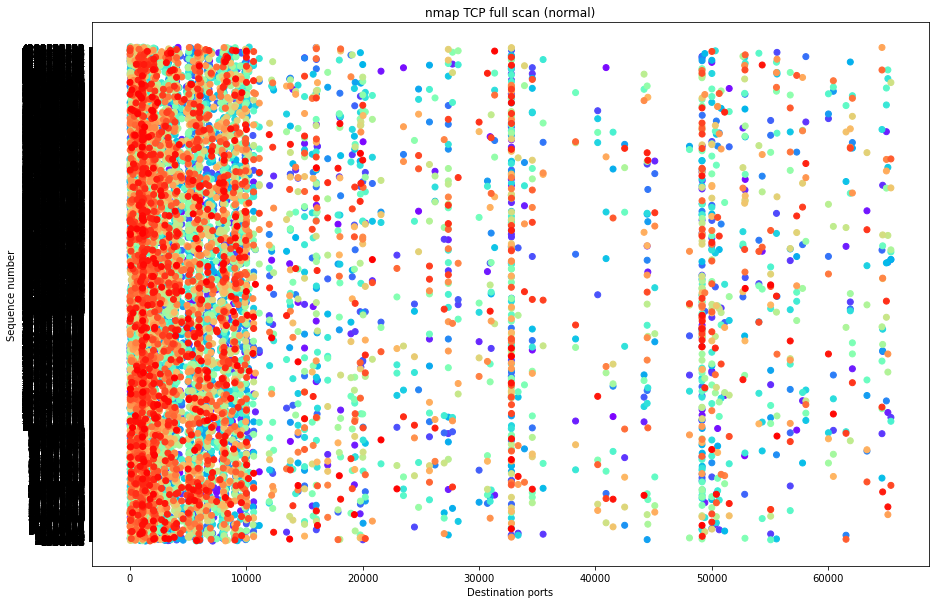

In [33]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

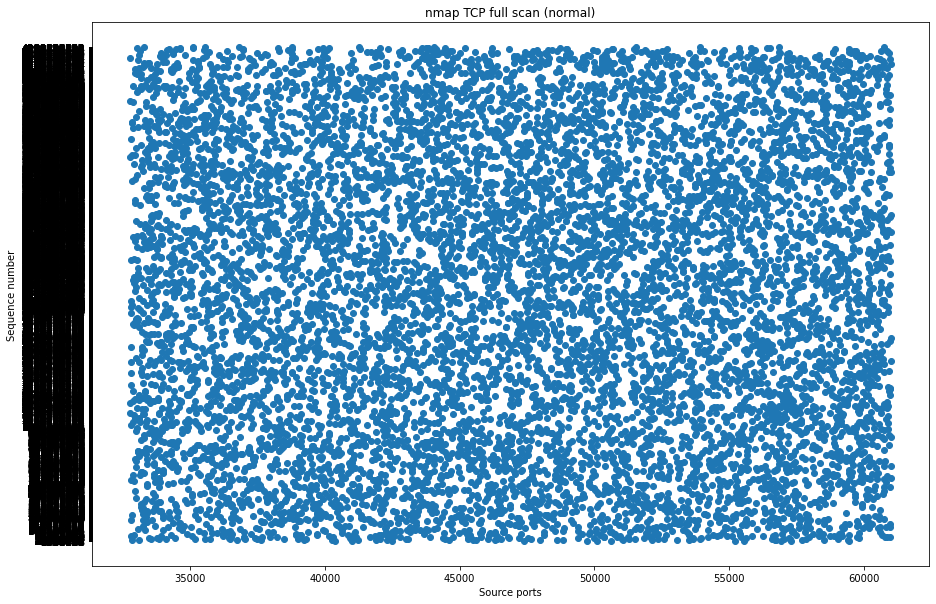

In [34]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()s


In [35]:
len(set(orders_port['sport']))

7116

## Flags

In [36]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F